# Lab 10 - Radiation Shielding (Part 10)

Edit this cell and provide the information requested:

- Your name: Marie Curie
- Your student number: 12345678
- Partner's name: Ray Gamma

In [1]:
import numpy as np
import data_entry
import matplotlib.pyplot as plt

## Part B -  Discussion of revised model and non-linear fit

Our new model will handle the issue of background radiation, which caused our previous model to fail (as determined last week). The new model consists of the old model, which handles the attenuation of radiation from the source, plus a constant term to reflect the (assumed) constant rate of background radiation:

$$ R(x) = R_0 e^{-\mu x} + R_b .$$

Like last week, we will set the thickness of shielding, $x$, to be in number of sheets of paper and we will measure the detected count rate at this thickness, $R(x)$. Therefore, the unattenuated count rate, $R_0$, the attenuation coefficient, $\mu$, and the background radiation count rate, $R_b$, will be fitting parameters. See the lab notes from last time for a description of how $u[R(x)]$ is calculated.

Though this model is nonlinear and cannot be linearized, as suggested we will still fit in semilog space for the ease of judging goodness of fit. We will use the following initial guesses for the fitting parameters:

- $R_0 = 15.6$ Bq, from our fit to the low thickness data from last week 
- $\mu = 0.3$ (sheets)$^{-1}$, from our fit to the low thickness data from last week
- $R_b = 0.1$ Bq, from our thickest measurement last week (20 sheets).

## Part C - Further measurements, fitting and improvements

Since we were able to collect data across a wide range of thicknesses last week, we will start by analyzing these data with the new model, then see where is most appropriate to add new data to help constrain our fit. We will also complete a measurement of the background radiation rate by running the counter without the source present in the holder.

In [2]:
de = data_entry.sheet_copy("../Lab09/lab09_data2", "lab09_data2")

Sheet name: lab09_data2.csv


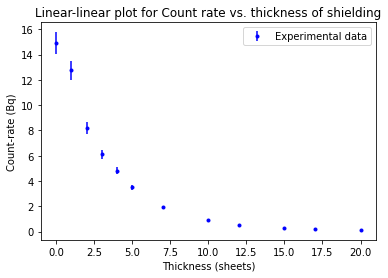

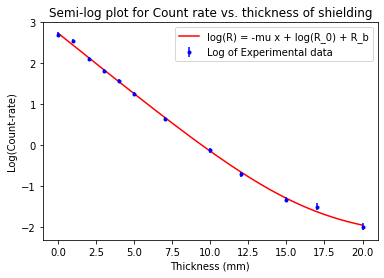

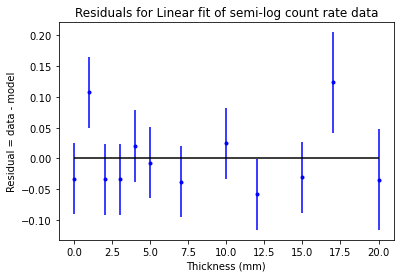

Chi-squared 0.9965522651286148


In [3]:
RateVec = NVec / tVec # calculating count rate

### timing uncertainty, from last week ###
timingData = np.array([0.94, 1.00, 0.93, 1.02, 1.16, 0.99, 0.93, 1.01, 1.03, 1.04, 1.01, 0.90, 1.02, 1.01, 1.08, 1.04, 0.90, 0.80, 1.19, 1.00])
ut = np.sqrt(2) * np.std(timingData, ddof=1)

uRateVec = RateVec * np.sqrt( 1/NVec + (ut/tVec)**2) # calculating uncertainty in count rate
logRateVec = np.log(RateVec) # taking log of count rate
ulogRateVec = uRateVec / RateVec # uncertainty of log(count rate), from the prelab

### LINEAR PLOT ###

# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

plt.errorbar(xVec, RateVec, uRateVec, fmt="bo", markersize=3, label="Experimental data")
plt.title("Linear-linear plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (sheets)")
plt.ylabel("Count-rate (Bq)")
plt.legend()
plt.show()


### SEMILOG PLOT with model ###
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for nonlinear model)
R0 = 15.3
mu = 0.300
Rb = 0.105

ypointsLinear = R0 * np.exp(-mu * xpoints) + Rb
ypoints = np.log(ypointsLinear) # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0) + R_b")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodelLinear = R0 * np.exp(-mu * xVec) + Rb
ymodel = np.log(ymodelLinear)

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()

# CHI-SQUARED CALCULATION
N = len(xVec)
P = 3  # 3 parameters; R0, mu, Rb
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared", chisquared)

In [4]:
deFit = data_entry.sheet("fitting_params_record")

Sheet name: fitting_params_record.csv


In [5]:
### BEST FIT PARAMETERS ###
R0Best = 15.3
muBest = 0.300
RbBest = 0.105

### UNCERTAINTY IN FIT PARAMETERS ###
uR0 = (16.2 - 14.3) / 4
umu = (0.311 - 0.292) / 4
uRb = (0.131 - 0.082) / 4

print('R0 = ', R0Best, ' +/- ', uR0, ' Bq')
print('mu = ', muBest, ' +/- ', umu, ' 1/sheets')
print('Rb = ', RbBest, ' +/- ', uRb, ' Bq')

print('Rel uncertainty in R0 = ', uR0/R0Best)
print('Rel uncertainty in mu = ', umu/muBest)
print('Rel uncertainty in Rb = ', uRb/RbBest)

R0 =  15.3  +/-  0.47499999999999964  Bq
mu =  0.3  +/-  0.004750000000000004  1/sheets
Rb =  0.105  +/-  0.01225  Bq
Rel uncertainty in R0 =  0.031045751633986905
Rel uncertainty in mu =  0.01583333333333335
Rel uncertainty in Rb =  0.11666666666666668


After iteratively fitting to our data to three sig figs in each parameter, we found best fit parameters of $R_0=15.30 \pm 0.47$ Bq (relative uncertainty of 0.031), $\mu = 0.3000 \pm 0.0048$ (sheets)$^{-1}$ (relative uncertainty of 0.016), and $R_b = 0.105 \pm 0.012$ Bq (relative uncertainty of 0.12). This yields a minimized chi-squared of 1.00, which indicates a good fit to the data provided the uncertainties are well estimated. Given that the uncertainties are mostly calculated from the theoretical Poisson distribution, we believe are our uncertainties are well estimated. These claims are supported by the residuals plot, since we observe even scatter, no obvious trends, and not all error bars crossing the x-axis. Uncertainty in the fitting parameters was determined by separately increasing/decreasing each parameter from their best fit value until $\chi^2 \to \chi^2 + 1 \approx 1.90$ to define a 95\% confidence interval, then dividing this interval by four to arrive at the uncertainty estimate.

This model fit is much better than the previous model fit over the entire dataset, since the latter had a chi-squared of 10.4 and had an obvious trend in the residuals. This means that we cannot neglect the effect of background radiation in our dataset, and the model must include the constant term to describe the data well over the range we investigated.

We also made a background radiation measurement with 400 counts to balance counting statistics with time available in the lab (shown below) and found $R_b = 0.0950 \pm 0.0048$ Bq. Comparing this measured value to our best fit value of $R_b$ with a t-score we found 0.78, which tells us we are not at all confident these values are different. This is expected as the model fit to the data is well, so we presume that the fitted $R_b$ is doing a good job of modeling the real background radiation within the precision level of our dataset.

Most other groups similarly found good fits to their data with the new model, with chi-squared values ranging from 0.61 to 2.32. Relative uncertainties in fitting parameters were similar as well, with $u[R_0]/R_0$ and $u[\mu]/\mu$ on the order of 0.01 and $u[R_b]/R_b$ on the order of 0.1. However, one group had very high relative uncertainty in their fitted $R_b$ (0.47), but they only measured up to a thickness of 10 sheets in their dataset. This makes it difficult to constrain $R_b$, since its effect is only noticeable at greater thicknesses.

In [6]:
NbMeasured = 400 # background counts
tbMeasured = 4209.74 # time to reach background count goal
RbMeasured = NbMeasured / tbMeasured # background count rate estimate
uRbMeasured = RbMeasured * np.sqrt( 1/NbMeasured + (ut/tbMeasured)**2)

print('Rb (measured) = ', RbMeasured, ' +/- ', uRbMeasured, ' Bq')

tscore = np.abs(RbMeasured - RbBest) / np.sqrt(uRbMeasured**2 + uRb**2)
print('t-score = ', tscore)

Rb (measured) =  0.09501774456379729  +/-  0.004750888056697627  Bq
t-score =  0.7597421472701035


### Improvements

Given that the relative uncertainty in $R_b$ is an order of magnitude higher than that of $R_0$ or $\mu$, we will add some new measurements in the larger thickness range to better constrain $R_b$. We decided to fill in gaps in our dataset in this range by measuring at thicknesses of 11, 13, 14, and 16 sheets. We aimed for 200 counts to maximize counting statistics (and hence minimize relative uncertainty in these measurements) while being mindful of the time remaining in the lab.

In [7]:
de2 = data_entry.sheet_copy("lab09_data2", "lab10_data")

Sheet name: lab10_data.csv


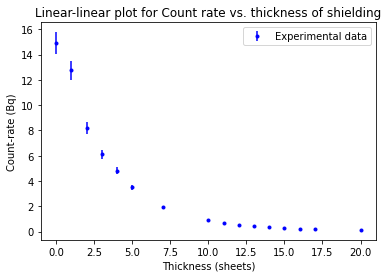

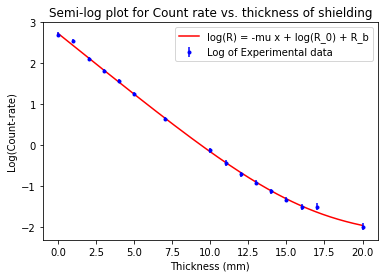

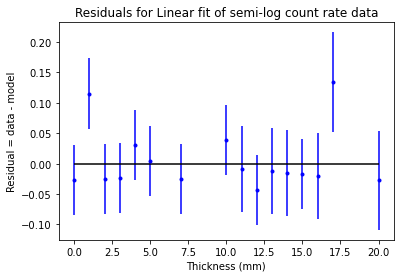

Chi-squared 0.7010537338097375


In [8]:
RateVec = NVec / tVec # calculating count rate
uRateVec = RateVec * np.sqrt( 1/NVec + (ut/tVec)**2) # calculating uncertainty in count rate
logRateVec = np.log(RateVec) # taking log of count rate
ulogRateVec = uRateVec / RateVec # uncertainty of log(count rate), from the prelab

### LINEAR PLOT ###

# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

plt.errorbar(xVec, RateVec, uRateVec, fmt="bo", markersize=3, label="Experimental data")
plt.title("Linear-linear plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (sheets)")
plt.ylabel("Count-rate (Bq)")
plt.legend()
plt.show()


### SEMILOG PLOT with model ###
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for nonlinear model)
R0 = 15.2
mu = 0.301
Rb = 0.105

ypointsLinear = R0 * np.exp(-mu * xpoints) + Rb
ypoints = np.log(ypointsLinear) # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0) + R_b")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodelLinear = R0 * np.exp(-mu * xVec) + Rb
ymodel = np.log(ymodelLinear)

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()

# CHI-SQUARED CALCULATION
N = len(xVec)
P = 3  # 3 parameters; R0, mu, Rb
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared", chisquared)

In [9]:
deFit2 = data_entry.sheet("fitting_params_record2")

Sheet name: fitting_params_record2.csv


In [10]:
### BEST FIT PARAMETERS ###
R0Best = 15.2
muBest = 0.301
RbBest = 0.105

### UNCERTAINTY IN FIT PARAMETERS ###
uR0 = (16.3 - 14.3) / 4
umu = (0.310 - 0.293) / 4
uRb = (0.130 - 0.083) / 4

print('R0 = ', R0Best, ' +/- ', uR0, ' Bq')
print('mu = ', muBest, ' +/- ', umu, ' 1/sheets')
print('Rb = ', RbBest, ' +/- ', uRb, ' Bq')

print('Rel uncertainty in R0 = ', uR0/R0Best)
print('Rel uncertainty in mu = ', umu/muBest)
print('Rel uncertainty in Rb = ', uRb/RbBest)

R0 =  15.2  +/-  0.5  Bq
mu =  0.301  +/-  0.004250000000000004  1/sheets
Rb =  0.105  +/-  0.01175  Bq
Rel uncertainty in R0 =  0.03289473684210526
Rel uncertainty in mu =  0.014119601328903667
Rel uncertainty in Rb =  0.11190476190476191


After adding these new data points, our updated best fit parameters are essentially identical from last time: $R_0=15.20 \pm 0.50$ Bq, $\mu = 0.3010 \pm 0.0042$ (sheets)$^{-1}$, and $R_b = 0.105 \pm 0.012$ Bq. Our relative uncertainty in $R_0$ went up slightly from 0.031 to 0.033, but relative uncertainty in $\mu$ went down from 0.016 to 0.014 and relative uncertainty in $R_b$ went down from 0.12 to 0.11. To make large reductions in relative uncertainty, we would likely need to replace run the thickness measurements with more counts, but we were unable to do so given the time constraints.

This best fit produces a chi-squared of 0.70, which indicates a good fit to the data provided the uncertainties are well estimated. Our residuals plot again shows even scatter, no obvious trends, and not all error bars crossing, which all support the above statements.

Other groups continued to have good fits to their data, with chi-squared values ranging from 0.47 to 1.77 and relative uncertainties with similar orders of magnitude. The one group who didn't initially measure at larger thicknesses and thus had difficulties constraining $R_b$ improved their dataset with measurements at greater thicknesses and were able to lower $u[R_b]/R_b$ to 0.15.

Since our estimated $R_b$ from the model fit did not change from last round, we find a very similar t-score of 0.79 when comparing to the directly measured value. This means we still are not confident that the two values are different.

In [11]:
tscore = np.abs(RbMeasured - RbBest) / np.sqrt(uRbMeasured**2 + uRb**2)
print('t-score = ', tscore)

t-score =  0.7876090585784719


## Summary of Results

In this lab we were able to fit an improved model that accounts for background radiation to a dataset with count rate data across a wide range of shielding thicknesses (0-20 sheets). This new model provides a good fit to the data ($\chi^2=0.70$) across the entire range of thicknesses, as evidenced by the lack of trend anywhere across the residuals. The model from last week that does not account for background radiation fails to model the higher thickness measurements since background radiation count rate is comparable to the attenuated count rate from the source in this range. This leads to a much higher chi-squared (10.4) and an obvious trend in the residuals.

Our final model fit parameters are $R_0=15.20 \pm 0.50$ Bq, $\mu = 0.3010 \pm 0.0042$ (sheets)$^{-1}$, and $R_b = 0.105 \pm 0.012$ Bq with relative uncertainties of 0.033, 0.014, and 0.11. These reasonably low relative uncertainties indicate that our data are of high quality given the time constraints of this lab, which limit the amount of counts we can acquire per measurement and hence the relative uncertainties of our individual measurements.

Since attenuation is governed by $e^{-\mu x}$, when $x=1/\mu$ the count rate will decrease to $1/e$ (roughly 37\%) of its unattenuated count rate, $R_0$. This corresponds to about $1/0.301 \approx 3.3$ sheets of paper.

We are not at all confident that the estimated $R_b$ from the model fit is different from a directly measured value of $R_b = 0.0950 \pm 0.0048$ Bq ($t'=0.79$), which we should expect since the model is describing the data well, especially in the higher thickness range where the effects of $R_b$ are most noticeable. 

We are confident that the estimated $\mu$ value from the new model is different from the estimate with the old model when we fit over the entire dataset ($t'=9.03$, see calculation below). However, last week we recognized the failure of the model over the entire dataset and thus performed an additional fit restricted to thicknesses up to 7 sheets, so when we compare the $\mu$ value from the new model fitted to the entire dataset to the $\mu$ value from the old model fit to this subset of the data, we are not at all confident these values are different ($t'=0.11$, see calculation below). This reaffirms that the old model can only model the data when the attenuated count rate from the source is much greater than the background count rate, i.e. at lower thicknesses.

In [12]:
tscore_mu_full = np.abs(muBest - 0.2540381308636413) / np.sqrt(umu**2 + 0.0029949922083424402**2)
print('t-score for new mu vs. old mu (full dataset) = ', tscore_mu_full)
tscore_mu_subset = np.abs(muBest - 0.2998469713955955) / np.sqrt(umu**2 + 0.009773131809999037**2)
print('t-score for new mu vs. old mu (subset of dataset) = ', tscore_mu_subset)

t-score for new mu vs. old mu (full dataset) =  9.0323850292282
t-score for new mu vs. old mu (subset of dataset) =  0.10819212213486216


### Submission

As we've done before, please re-run your entire notebook, ensure that everything executed successfully (especially the final cell below) then export as html, and upload to Canvas.

In [13]:
display_sheets()

Sheet: de   File: lab09_data2.csv


,x,N,t
Units,number of sheets,counts,seconds
0,0,306,20.53
1,1,300,23.55
2,2,301,36.61
3,3,301,49.21
4,4,300,62.37
5,5,300,85.87
6,7,300,157.47
7,10,300,337.74
8,15,300,1125.13


Sheet: deFit   File: fitting_params_record.csv


,R0,mu,Rb,chi2
Units,Bq,1/sheets,Bq,null
0,15.6,0.3,0.1,1.133
1,15.5,0.3,0.1,1.078
2,15.4,0.3,0.1,1.044
3,15.3,0.3,0.1,1.033
4,15.2,0.3,0.1,1.044
5,15.3,0.31,0.1,2.378
6,15.3,0.29,0.1,2.378
7,15.3,0.301,0.1,1.056
8,15.3,0.299,0.1,1.044


Sheet: de2   File: lab10_data.csv


,x,N,t
Units,number of sheets,counts,seconds
0,0,306,20.53
1,1,300,23.55
2,2,301,36.61
3,3,301,49.21
4,4,300,62.37
5,5,300,85.87
6,7,300,157.47
7,10,300,337.74
8,15,300,1125.13


Sheet: deFit2   File: fitting_params_record2.csv


,R0,mu,Rb,chi2
Units,Bq,1/sheets,Bq,null
0,15.3,0.3,0.105,0.74
1,15.4,0.3,0.105,0.776
2,15.2,0.3,0.105,0.723
3,15.1,0.3,0.105,0.726
4,15.2,0.301,0.105,0.701
5,15.2,0.302,0.105,0.708
6,15.2,0.301,0.106,0.702
7,15.2,0.301,0.104,0.703
8,15.2,0.301,0.105,0.701
